### Read contour data and preprocess

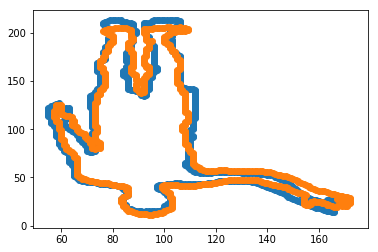

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

path = 'photo\p0\\'
data1 = np.load(path+'back_small_contours.npy')
data2 = np.load(path+'back_small_contours_smpl.npy')

len1 = len(data1) #3018
len2 = len(data2) #3088

data2 +=[2,0]

# x_mask = np.append(data1[:,0],data2[:,0])
# y_mask = np.append(data1[:,1],data2[:,1])

# plt.scatter(x_mask, y_mask)
plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])
plt.show()

In [5]:
def distance_2d(x1, y1, x2, y2):
    return np.sqrt(pow(x1-x2,2) + pow(y1-y2,2))

def get_list(mat,start,end):
    if start>=0:
        mat = mat.tolist()[0][start:end]
    else:
        mat_len =mat.size
        mat = mat.tolist()[0]
        mat = mat[mat_len+start:mat_len]+mat[0:end]
    return mat

def find_min(current,lis,k,len_n):
    if(current>=k):
        minV = min(lis)
        pos = lis.index(minV)
        return current-k+pos,minV
    else:
        minV = min(lis)
        pos = lis.index(minV)
        if(pos>=k-current):
            return current-k+pos,minV
        else:
            return len_n-k+current+pos,minV

In [6]:
dp_matrix_value = np.mat(np.zeros((len1,len2)))

dp_matrix_father = np.mat(np.zeros((len1,len2)))

dp_matrix_value = dp_matrix_value+float('inf')
dp_matrix_father = dp_matrix_father-1 

for j in range(len2):
    dp_matrix_value[0,j] =  distance_2d(data1[0,0],data1[0,1],data2[j,0],data2[j,1])
    dp_matrix_father[0,j] =  j

    
k=32 
for i in range(1,len1):
    for j in range(len2):
        before,min_value = find_min(j,get_list(dp_matrix_value[i-1,:],j-k,j+1),k,len2)
        dp_matrix_value[i,j] = min_value + distance_2d(data1[i,0],data1[i,1],data2[j,0],data2[j,1])
        
        dp_matrix_father[i,j] = before
    print(i,"/",len1)

1 / 845
2 / 845
3 / 845
4 / 845
5 / 845
6 / 845
7 / 845
8 / 845
9 / 845
10 / 845
11 / 845
12 / 845
13 / 845
14 / 845
15 / 845
16 / 845
17 / 845
18 / 845
19 / 845
20 / 845
21 / 845
22 / 845
23 / 845
24 / 845
25 / 845
26 / 845
27 / 845
28 / 845
29 / 845
30 / 845
31 / 845
32 / 845
33 / 845
34 / 845
35 / 845
36 / 845
37 / 845
38 / 845
39 / 845
40 / 845
41 / 845
42 / 845
43 / 845
44 / 845
45 / 845
46 / 845
47 / 845
48 / 845
49 / 845
50 / 845
51 / 845
52 / 845
53 / 845
54 / 845
55 / 845
56 / 845
57 / 845
58 / 845
59 / 845
60 / 845
61 / 845
62 / 845
63 / 845
64 / 845
65 / 845
66 / 845
67 / 845
68 / 845
69 / 845
70 / 845
71 / 845
72 / 845
73 / 845
74 / 845
75 / 845
76 / 845
77 / 845
78 / 845
79 / 845
80 / 845
81 / 845
82 / 845
83 / 845
84 / 845
85 / 845
86 / 845
87 / 845
88 / 845
89 / 845
90 / 845
91 / 845
92 / 845
93 / 845
94 / 845
95 / 845
96 / 845
97 / 845
98 / 845
99 / 845
100 / 845
101 / 845
102 / 845
103 / 845
104 / 845
105 / 845
106 / 845
107 / 845
108 / 845
109 / 845
110 / 845
111 / 84

833 / 845
834 / 845
835 / 845
836 / 845
837 / 845
838 / 845
839 / 845
840 / 845
841 / 845
842 / 845
843 / 845
844 / 845


In [7]:
lis=[]

temp = dp_matrix_value[len1-1,:].tolist()[0]
minV = min(temp)
pos = temp.index(minV)
lis.append((len1-1,pos))
print(len1-1,"->",pos)

for i in range(len1-1):
    j = dp_matrix_father[len1-2-i,int(pos)]
    lis.append((len1-2-i,int(j)))
    print(len1-2-i,"->",int(j))
    pos = j
    
numpy_array = np.array(lis)
# np.save('corresponding_contours.npy',numpy_array )
np.save(path+'back_small_corresponding_contours.npy',numpy_array )
# corresponding_chonghe =np.load('.../corresponding_chonghe.npy')

844 -> 1
843 -> 805
842 -> 803
841 -> 803
840 -> 800
839 -> 800
838 -> 799
837 -> 798
836 -> 798
835 -> 795
834 -> 794
833 -> 793
832 -> 792
831 -> 791
830 -> 790
829 -> 789
828 -> 788
827 -> 787
826 -> 785
825 -> 785
824 -> 784
823 -> 783
822 -> 782
821 -> 780
820 -> 780
819 -> 778
818 -> 778
817 -> 776
816 -> 776
815 -> 775
814 -> 774
813 -> 774
812 -> 773
811 -> 773
810 -> 772
809 -> 771
808 -> 770
807 -> 769
806 -> 768
805 -> 768
804 -> 766
803 -> 765
802 -> 764
801 -> 763
800 -> 762
799 -> 760
798 -> 760
797 -> 758
796 -> 758
795 -> 757
794 -> 756
793 -> 754
792 -> 754
791 -> 752
790 -> 752
789 -> 750
788 -> 750
787 -> 749
786 -> 748
785 -> 747
784 -> 746
783 -> 745
782 -> 744
781 -> 743
780 -> 742
779 -> 741
778 -> 740
777 -> 739
776 -> 738
775 -> 735
774 -> 734
773 -> 734
772 -> 732
771 -> 731
770 -> 731
769 -> 729
768 -> 729
767 -> 724
766 -> 724
765 -> 723
764 -> 722
763 -> 721
762 -> 720
761 -> 720
760 -> 714
759 -> 713
758 -> 712
757 -> 711
756 -> 710
755 -> 709
754 -> 708
7

In [8]:
# lis =np.load('corresponding_contours.npy')
lis =np.load(path+'back_small_corresponding_contours.npy')
# data2 = np.load('.../small_contours_smpl.npy')#这个地方先待定

In [9]:
import cv2
import matplotlib.image as mpimg

def getPointIn(path,outPoint):
    img =mpimg.imread(path)
    q=[]
    
    w,h,_=img.shape
    
    for i in range(h):
        for j in range(w):
            if cv2.pointPolygonTest(outPoint,(i,j),False)==1:
                q.append([i,j])
    return q

In [10]:
# im_path = 'kuli_mask.png'
im_path = path+'back_s_p_mask.png'
list_in_contours  = getPointIn(im_path,data1)
len(list_in_contours)#73273
#17651

6369

In [11]:
def getTan(x,y,z):
    a=np.array([x[0]-y[0],x[1]-y[1]])
    b=np.array([z[0]-y[0],z[1]-y[1]])
    sin =np.abs((a[0]*b[1]-a[1]*b[0])/(np.linalg.norm(a)*np.linalg.norm(b)))
    return  sin/(1+np.sqrt(1-sin*sin))

In [12]:
data2 = np.load(path+'back_small_contours_smpl.npy')

In [13]:
result=[]

for pos,j in enumerate(list_in_contours):
    tan=[] 
    for i in range(1,len(data1)):
        tan.append(getTan(data1[i-1],j,data1[i]))
    tan.append(getTan(data1[-1],j,data1[0]))
    w=[]
    sum=0
    for i in range(len(data1)):        
        w.append( (tan[i]+tan[i-1])/np.sqrt((data1[i][0]-j[0])*(data1[i][0]-j[0])+(data1[i][1]-j[1])*(data1[i][1]-j[1])))
        sum=sum+w[-1]
    w=w/sum

    a=0
    b=0
    for q in range(len(data1)):
        a=a+w[q]*data2[ (int)( lis[len1-1-q][1])  ][0]
        b=b+w[q]*data2[ (int)( lis[len1-1-q][1])  ][1]
    result.append((list_in_contours[pos],[int(a),int(b)]))
    
    if(pos%1000==0):
        print(pos,result[-1]) 


0 ([56, 114], [57, 113])
1000 ([77, 120], [72, 118])
2000 ([83, 165], [85, 164])
3000 ([90, 104], [81, 102])
4000 ([97, 155], [91, 153])
5000 ([103, 81], [98, 81])
6000 ([125, 54], [120, 56])


In [14]:
len(result)

6369

In [15]:
# Save results
result_np = np.array(result)
# np.save('corresponding_in.npy',result_np )
np.save(path+'back_small_corresponding_in.npy',result_np )

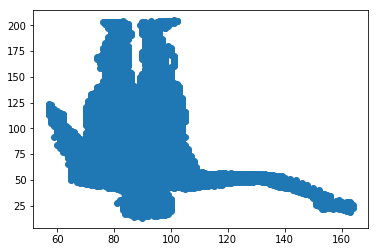

In [16]:
# Visualize corresponding points
x_duiyinghou =result_np[:,1,0]
y_duiyinghou =result_np[:,1,1]

plt.scatter(x_duiyinghou, y_duiyinghou)
plt.show()